# Conexão com postgres e Relatórios do Sistema

## Instalando biblioteca de acesso com postgres e manipulação de dados e gráficos

In [1]:
!pip install --user psycopg2-binary
!pip install --user seaborn
!pip install --user pandas

     |████████████████████████████████| 2.9MB 4.9MB/s 


### Importando bibliotecas

In [0]:
import seaborn as sns
import pandas as pd
import psycopg2

import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

### Usando psycopg2 para configurar conexão

In [0]:
conn = psycopg2.connect(host="tuffi.db.elephantsql.com",
                        database="xubzhvcc", 
                        user="xubzhvcc",
                        password="nXYY2mo9mt1RSIEAMG7F6rYw_ikut3hB")

# Relatório 1

### Objetivo: Obter a quantidade de lixo total coletado em determinado bairro em cada rota, evidenciando o caminhão que realizou aquela rota

Código para obtenção do resultado:

In [0]:
relat1 = pd.read_sql_query("""

                            SELECT
                              BAIRRO.nome as bairro,
                              sum(COLETA.volume) AS volumeT_coletado,
                              placa
                            FROM BAIRRO
                            INNER JOIN LIXEIRA ON (BAIRRO.cod_bairro = LIXEIRA.cod_bairro)
                            INNER JOIN COLETA ON (LIXEIRA.cod_lixeira = COLETA.cod_lixeira)
                            INNER jOIN CAMINHAO ON (CAMINHAO.cod_caminhao = COLETA.cod_caminhao)
                            GROUP BY BAIRRO.nome, COLETA.cod_caminhao, CAMINHAO.placa
                            ORDER BY volumeT_coletado
                            
                             """,conn)

In [119]:
relat1

,bairro,volumet_coletado,placa
0,Centro de Vitória,90.00,MQZ8687
1,Carapina,294.00,MTR3338
2,Porto de Santana,297.00,MQZ8687
3,Centro de Vitória,409.50,MTV4311
4,Grande Goiabeiras,500.02,MTV4311
5,Grande Goiabeiras,535.90,MTR3338
6,Colina de Laranjeiras,614.00,MQZ8687


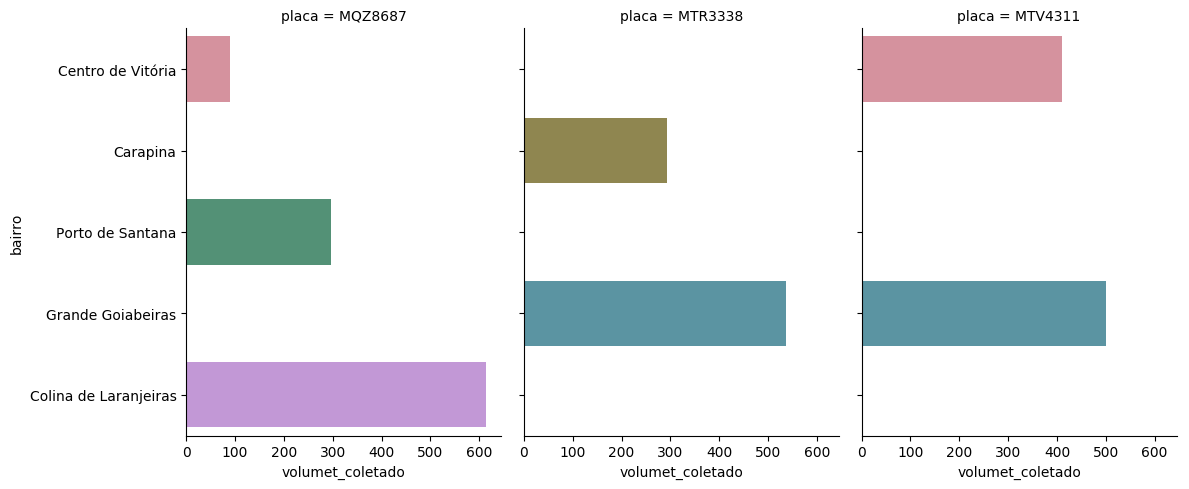

In [120]:
df = relat1
sns.catplot(x="volumet_coletado", y="bairro", col="placa",
                data=df, saturation=.5,
                kind="bar", ci=None, aspect=.8, palette= "husl")

      

####O gráfico mostra o volume coletado por bairro para cada caminhão, representado por sua placa. Fica claro que um mesmo caminhão é alocado para realizar rotas em 2 a 3 bairros distintos e que em cada bairro a coleta é realizada por 1 ou 2 caminhões diferentes.



# Relatório 2

### Objetivo: Obter a quantidade de descartes e o volume descartado em determinada lixeira, por dia

Código para obtenção do resultado:

In [0]:
relat2 = pd.read_sql_query("""
                            SELECT
                              lixeira.cod_lixeira,
                              bairro.nome as bairro,
                              count(DESCARTE.cod_lixeira) as qnt_descarte,
                              sum(DESCARTE.volume) as volume_total,
                              data_descarte
                              FROM descarte
                              INNER JOIN lixeira ON (descarte.cod_lixeira = lixeira.cod_lixeira)
                              INNER JOIN bairro ON (lixeira.cod_bairro = bairro.cod_bairro)
                              GROUP BY bairro.cod_bairro, lixeira.cod_lixeira, data_descarte
                              ORDER BY bairro.nome
                            
                            """, conn)


In [178]:
relat2

,cod_lixeira,bairro,qnt_descarte,volume_total,data_descarte
0,23,Carapina,1,33.300000,2019-03-30
1,23,Carapina,2,58.300000,2019-03-31
2,22,Carapina,3,100.400000,2019-03-31
3,22,Carapina,1,5.100000,2019-04-21
4,21,Carapina,1,22.000000,2019-03-31
5,21,Carapina,3,80.000000,2019-03-30
6,10,Centro de Vitória,1,66.666667,2019-03-27
7,8,Centro de Vitória,1,19.800000,2019-03-26
8,11,Centro de Vitória,1,30.000000,2019-03-27
9,7,Centro de Vitória,1,30.100000,2019-03-25


Text(0.5, 0, 'Volume total')

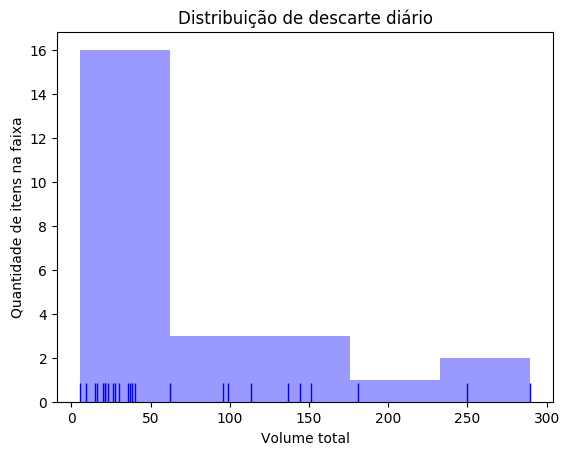

In [170]:
df = relat2
sns.distplot(df.volume_total, kde=False, rug =True, color = "b")
plt.title('Distribuição de descarte diário')
plt.ylabel('Quantidade de itens na faixa')
plt.xlabel('Volume total')



####O histograma representa a distribuição do volume descartado nas lixeiras diariamente. Pelo gráfico de distribuição de descarte diário, fica claro que na maioria das vezes uma lixeira recebe de 5 a 60 litros de resíduos diariamente.

#Relatório 3 

###Objetivo: Identificar a quantidade de operações de descarte e o volume total descartado por bairro.


In [0]:
relat3 = pd.read_sql_query("""
                            SELECT
                              bairro.nome as bairro,
                              count(DESCARTE.cod_lixeira) as qnt_descarte,
                              sum(DESCARTE.volume) as volume_total
                              FROM descarte
                              INNER JOIN lixeira ON (descarte.cod_lixeira = lixeira.cod_lixeira)
                              INNER JOIN bairro ON (lixeira.cod_bairro = bairro.cod_bairro)
                              GROUP BY bairro.nome
                              ORDER BY volume_total DESC
                            
                            """, conn)                            

In [125]:
relat3

,bairro,qnt_descarte,volume_total
0,Grande Goiabeiras,32,924.600000
1,Colina de Laranjeiras,11,325.466667
2,Carapina,11,299.100000
3,Centro de Vitória,7,223.566667
4,Porto de Santana,5,114.033333


Text(0.5, 29.140624999999986, 'Quantidade de descarte')

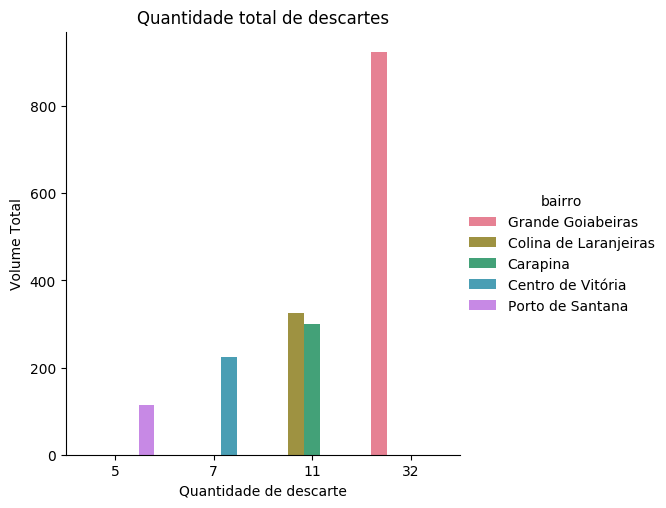

In [126]:
df = relat3
sns.catplot(x="qnt_descarte", y="volume_total", hue="bairro", data=relat3, kind="bar", palette= "husl")
plt.title('Quantidade total de descartes')
plt.ylabel('Volume Total')
plt.xlabel('Quantidade de descarte')


####O gráfico mostra a quantidade de descartes e o seu volume total, agrupados por bairros.

####Pelo gráfico de Quantidade total de descarte fica percepitível que o relatório 2  é condizente, uma vez que existe uma tendência clara de que em bairros com maior quantidade de descarte apresentam um somatório maior proporcionalmente. Isto é operações de descarte seguem um padrão para o volume descartado.

## Relatório 4


### Objetivo: Mostrar quantas vezes cada caminhão foi alocado, verificar quais estão sendo mais utilizados e os dados (placa, modelo, marca) dos mesmos

Código para obtenção do resultado:

In [0]:
relat4 = pd.read_sql_query("""

                            SELECT
                                placa,
                                MODELO.nome AS modelo,
                                MARCA.nome AS marca,
                                count(ALOCA.cod_caminhao) AS qnt_aloca
                              FROM CAMINHAO
                              LEFT JOIN ALOCA ON (CAMINHAO.cod_caminhao = ALOCA.cod_caminhao)
                              INNER JOIN MODELO ON (CAMINHAO.cod_modelo = MODELO.cod_modelo)
                              INNER JOIN MARCA ON (MODELO.cod_marca = MARCA.cod_marca)
                              GROUP BY CAMINHAO.cod_caminhao, ALOCA.cod_caminhao, MODELO.cod_modelo, MARCA.cod_marca
                              ORDER BY qnt_aloca DESC
                            
                            """,conn)

In [141]:
relat4

,placa,modelo,marca,qnt_aloca
0,MTR3338,2540,Mercedes Benz,3
1,MTB1361,G 440,Scania,2
2,MSG4883,P94 360,Scania,2
3,MTV4311,MB Axor 2036,Mercedes Benz,2
4,MRB6206,FH12 380,Volvo,2
5,MSZ7251,FH12 380,Volvo,2
6,MQZ8687,G 440,Scania,2
7,MRP5441,VW 8150,Volkswagen,1
8,MRY5351,VM 270,Volvo,1
9,MRF7474,VW 13180,Volkswagen,1


Text(0.5, 1.0, 'Alocação de caminhão')

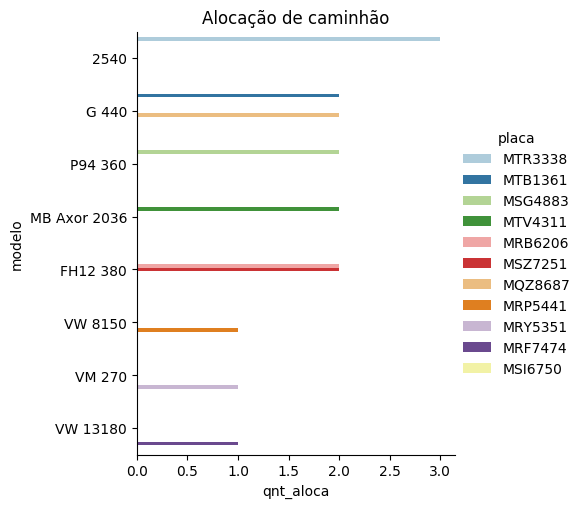

In [144]:
df = relat4
sns.catplot(y="modelo", x="qnt_aloca", hue="placa", data=df, kind="bar", palette= "Paired",)
plt.title('Alocação de caminhão')

####O gráfico mostra a quantidades de vezes em que cada caminhão foi alocado. É possível notar que o modelo 2540 é o mais alocado e que o caminhão com placa MSI6750 não teve nenhuma alocação

## Relatório 5

### Objetivo: Verificar a quantidade de lixeiras em cada Status Operacional

Código para obtenção do resultado:

In [0]:
relat5 = pd.read_sql_query("""

                            SELECT 
                              status.descricao AS situacao_lixeira, 
                              count(SITUACAO_OPERACIONAL.cod_status) AS contagem
                              FROM SITUACAO_OPERACIONAL
                              INNER JOIN STATUS ON (SITUACAO_OPERACIONAL.cod_status = STATUS.cod_status)
                              GROUP BY (STATUS.cod_status)
                            ORDER BY contagem
    
                            """,conn)

In [133]:
relat5

,situacao_lixeira,contagem
0,Não atende a demanda,2
1,Quebrada,4


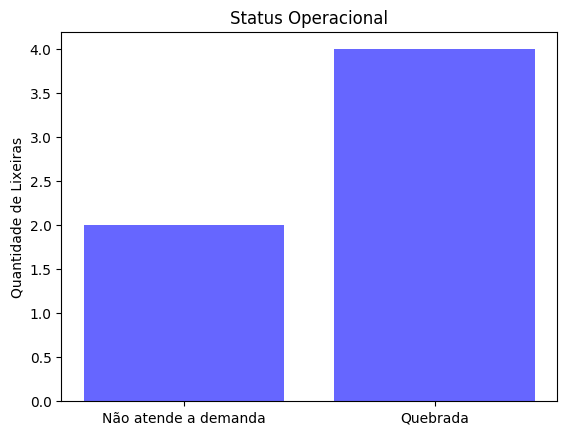

In [134]:
df = pd.DataFrame(relat5)
cm = sns.light_palette("blue", as_cmap=True)
df.style.background_gradient(cmap=cm)
 
objects = tuple(df.situacao_lixeira)
y_pos = np.arange(len(objects))
performance = list(df.contagem)
 
plt.bar(y_pos, performance, align='center', alpha=0.6, color = "b")
plt.xticks(y_pos, objects)
plt.ylabel('Quantidade de Lixeiras')
plt.title('Status Operacional')

plt.show()

## Relatório 6

#### Objetivo: Verificar quais lixeiras se encontram quebradas, para eventual troca, mostrando o código da lixeira, o bairro onde se encontra e suas coordenadas geográficas

Código para obtenção do resultado:

In [0]:
relat6 = pd.read_sql_query("""
                            SELECT 
                              LIXEIRA.cod_lixeira,
                              BAIRRO.nome as bairro,
                              'lat: '||LIXEIRA.latitude|| ' long: ' || LIXEIRA.longitude as localizacao
                              FROM SITUACAO_OPERACIONAL
                              INNER JOIN STATUS ON (SITUACAO_OPERACIONAL.cod_status = STATUS.cod_status)
                              INNER JOIN COLETA ON (SITUACAO_OPERACIONAL.cod_coleta = COLETA.cod_coleta)
                              INNER JOIN LIXEIRA ON (COLETA.cod_lixeira = LIXEIRA.cod_lixeira)
                              INNER JOIN BAIRRO ON (LIXEIRA.cod_bairro = BAIRRO.cod_bairro)
                              WHERE STATUS.descricao = 'Quebrada'
                            """,conn)

In [21]:
relat6

,cod_lixeira,bairro,localizacao
0,9,Centro de Vitória,lat: -20.19695 long: -40.251233
1,10,Centro de Vitória,lat: -20.196958 long: -40.252933
2,13,Colina de Laranjeiras,lat: -20.193958 long: -40.193958
3,14,Colina de Laranjeiras,lat: -20.196958 long: -40.196958


#Relatório 7

###Objetivo: Quantificar o número de Lixeiras Inteligentes por bairro


Código para obtenção do resultado:


In [0]:
relat7 = pd.read_sql_query("""SELECT 
                                count(*) as numero_de_lixeiras,
                                BAIRRO.nome as bairro
                              FROM BAIRRO INNER JOIN LIXEIRA ON (BAIRRO.cod_bairro = LIXEIRA.cod_bairro)
                              GROUP BY BAIRRO.nome;
                              """, conn)

In [147]:
relat7

,numero_de_lixeiras,bairro
0,6,Grande Goiabeiras
1,5,Centro de Vitória
2,5,Carapina
3,5,Colina de Laranjeiras
4,5,Jardim da Penha
5,4,Porto de Santana


Text(0.5, 1.0, 'Quantidade de Lixeiras Inteligentes por bairro')

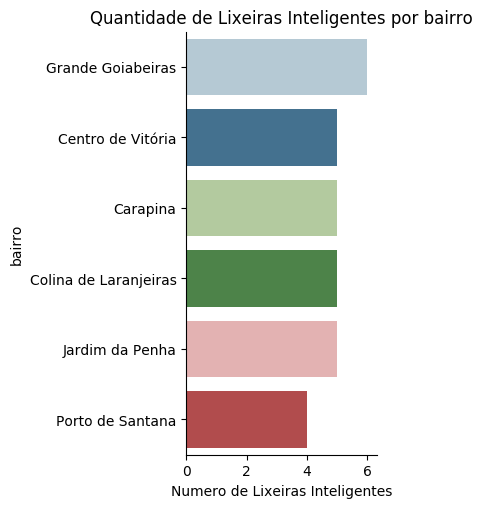

In [148]:
df = relat7

sns.catplot(x="numero_de_lixeiras", y="bairro",
                data=df, saturation=.5,
                kind="bar", ci=None, aspect=.8, palette= "Paired")
plt.xlabel('Numero de Lixeiras Inteligentes')
plt.title('Quantidade de Lixeiras Inteligentes por bairro')

####O gráfico mostra a quantidade de Lixeiras Inteligentes por bairro. É possível identificar que Grande Goiabeiras é o bairro com maior número de lixeiras inteligentes com um total de 6 e Porto de Santana é o lanterninha com 4. Os demais bairros apresentam 5 lixeiras cadastradas.

#Relatório 8


##Objetivo: Identificar o volume atual das lixeiras com lixo.


Código para obtenção do resultado:


In [0]:
relat8 = pd.read_sql_query("""SELECT lixeira.cod_lixeira,
                                  SUM(descarte.volume) AS somavolume,
                                  lixeira.capacidade, 
                                  (SUM(descarte.volume)/lixeira.capacidade) as nivel_Atual,
                                bairro.nome as bairro FROM lixeira
                                INNER JOIN descarte ON (lixeira.cod_lixeira = descarte.cod_lixeira)
                                INNER JOIN coleta ON (descarte.cod_lixeira = coleta.cod_lixeira)
                                INNER JOIN bairro ON (bairro.cod_bairro = lixeira.cod_bairro)
                                WHERE descarte.data_descarte > coleta.data_coleta 
                                OR (descarte.data_descarte = coleta.data_coleta AND descarte.hora_descarte > coleta.hora_coleta)
                                GROUP BY lixeira.cod_lixeira, lixeira.capacidade, bairro
                                ORDER BY lixeira.cod_lixeira
                              """, conn)

In [150]:
relat8

,cod_lixeira,somavolume,capacidade,nivel_atual,bairro
0,1,97.400000,160.0,0.608750,Grande Goiabeiras
1,2,57.000000,200.0,0.285000,Grande Goiabeiras
2,3,41.200000,205.0,0.200976,Grande Goiabeiras
3,4,115.700000,186.0,0.622043,Grande Goiabeiras
4,5,15.000000,100.0,0.150000,Grande Goiabeiras
5,6,82.200000,100.0,0.822000,Grande Goiabeiras
6,7,37.000000,100.0,0.370000,Centro de Vitória
7,9,40.000000,120.0,0.333333,Centro de Vitória
8,10,66.666667,200.0,0.333333,Centro de Vitória
9,12,21.666667,120.0,0.180556,Colina de Laranjeiras


Text(0.5, 9.444444444444438, 'Código da Lixeira')

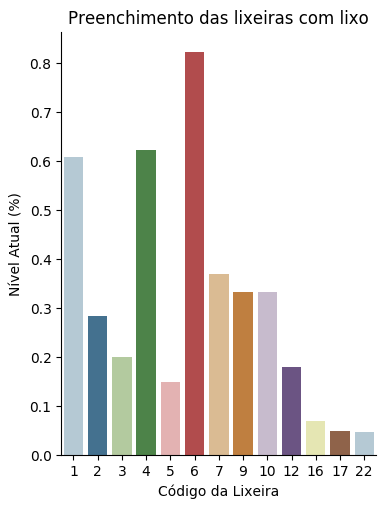

In [151]:
df = relat8;

current_palette = sns.color_palette()

sns.catplot(x="cod_lixeira", y="nivel_atual",
                data=df, saturation=.5,
                kind="bar", ci=None, aspect=.8, palette= "Paired");
plt.title('Preenchimento das lixeiras com lixo')
plt.ylabel('Nível Atual (%)')
plt.xlabel('Código da Lixeira')

####O gráfico mostra o preenchimento atual em porcentagem das lixeiras com lixo. 


# Referencias

https://pandas.pydata.org/pandas-docs/stable/style.html <br>
https://pythonspot.com/matplotlib-bar-chart/<br>
https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.loc.html <br>